<a href="https://colab.research.google.com/github/dollatrahul/Fungiclassification/blob/main/VGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install tensorflow

In [ ]:
!pip install split-folders

In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
import splitfolders
input_folder='/content/drive/MyDrive/defungi'
output='output'
splitfolders.ratio(input_folder,output=output,seed=42,ratio=(0.8,0.2))

Copying files: 9114 files [03:01, 50.14 files/s] 


In [ ]:
IMAGE_SIZE=[224,224]

train_path='/content/output/train'
valid_path='/content/output/test'

In [ ]:
vgg=VGG16(input_shape=IMAGE_SIZE+[3],weights='imagenet',include_top=False)

58889256/58889256 [==============================] - 4s 0us/step


In [ ]:
for layer in vgg.layers:
  layer.trainable=False

In [ ]:
folders=glob('/content/output/train/*')

In [ ]:
x=Flatten()(vgg.output)
prediction=Dense(len(folders),activation='softmax')(x)


In [ ]:
model=Model(inputs=vgg.input,outputs=prediction)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen=ImageDataGenerator(rescale=1./255)

test_datagen=ImageDataGenerator(rescale=1./255)

In [ ]:
train_set=train_datagen.flow_from_directory(
    train_path,
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical'
)

test_set=test_datagen.flow_from_directory('/content/output/val',
                                          target_size=(224,224),
                                          batch_size=32,
                                          class_mode='categorical')

Found 7290 images belonging to 5 classes.
Found 1824 images belonging to 5 classes.


In [ ]:
hist=model.fit(train_set,
          validation_data=test_set,
          epochs=3,
          verbose=1)

Epoch 1/3
228/228 [==============================] - 68s 243ms/step - loss: 1.1338 - accuracy: 0.5524 - val_loss: 1.0990 - val_accuracy: 0.5164
Epoch 2/3
228/228 [==============================] - 51s 222ms/step - loss: 0.8628 - accuracy: 0.6503 - val_loss: 1.0551 - val_accuracy: 0.4918
Epoch 3/3
228/228 [==============================] - 51s 224ms/step - loss: 0.7676 - accuracy: 0.6893 - val_loss: 0.8388 - val_accuracy: 0.6639


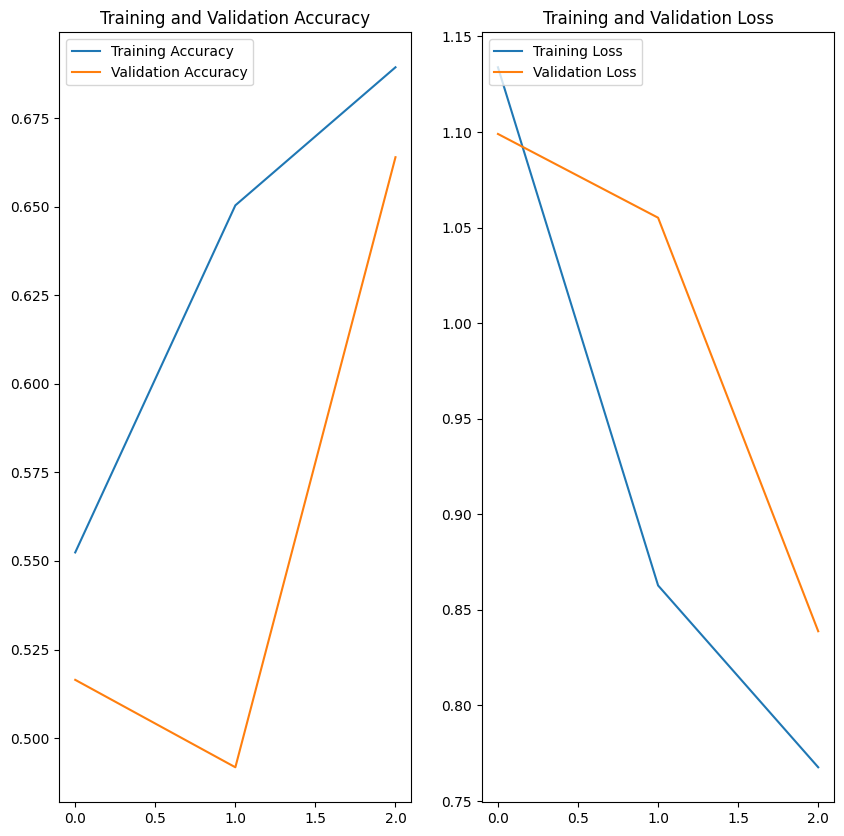

In [ ]:
acc=hist.history['accuracy']
val_acc=hist.history['val_accuracy']

loss=hist.history['loss']
val_loss=hist.history['val_loss']

plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.plot(range(3),acc,label='Training Accuracy')
plt.plot(range(3),val_acc,label='Validation Accuracy')
plt.legend(loc='upper left')
plt.title('Training and Validation Accuracy')


plt.subplot(1,2,2)
plt.plot(range(3),loss,label='Training Loss')
plt.plot(range(3),val_loss,label='Validation Loss')
plt.legend(loc='upper left')
plt.title('Training and Validation Loss')
plt.show()


In [ ]:
model.save("defungi1.hdf5")